# Iris dataset for Machine Learning Practice
Here we firstly analyse the Iris dataset to ensure it is ready to be used to create models, and then we experiment with many machine learning models to attempt to classify the species of flowers. The aim here is not to try to make the best model, just to experiment with some available models.

## A little bit of data cleaning
We begin by having a look at the data to check for any missing values, see what data types we have and just have a general look at the data to see what we are working with.

In [464]:
import pandas as pd
df = pd.read_csv('Iris.csv')

In [466]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We see that there are no missing data values so we do not need to sort any NANs out which is good

In [470]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

We also see the different species types are evenly distributed so we not need to think about using any weighted methods for the testing and training data

In [473]:
df.drop('Id', axis = 1, inplace = True)

We drop the column Id since this isn't useful for us in this particular case of predicting the species

## Exploratory data analysis
We now move on to having a look at how the independent variables are related to the dependent variable, Species, to help us with choosing which variables should be included in the model, as well as potentially helping us choose a suitable model.

In [475]:
import seaborn as sns
import matplotlib.pyplot as plt

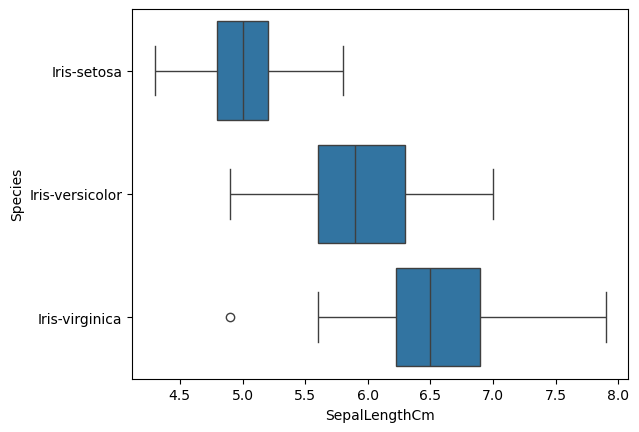

In [477]:
sns.boxplot(x = 'SepalLengthCm', y = 'Species', data = df)
plt.show()

We see here that the sepal length clearly is different for different species so will help us predict the species type

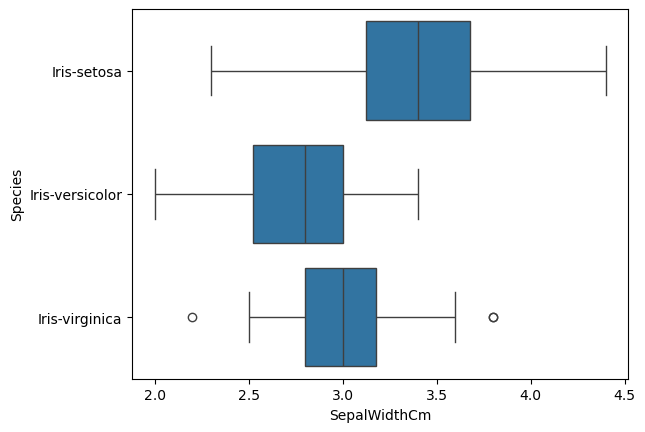

In [479]:
sns.boxplot(x = 'SepalWidthCm', y = 'Species', data = df)
plt.show()

The same can not be said for the sepal width, here we see a large overlap especially between the versicolor and virginica species so we will exclude this vairable for prediction

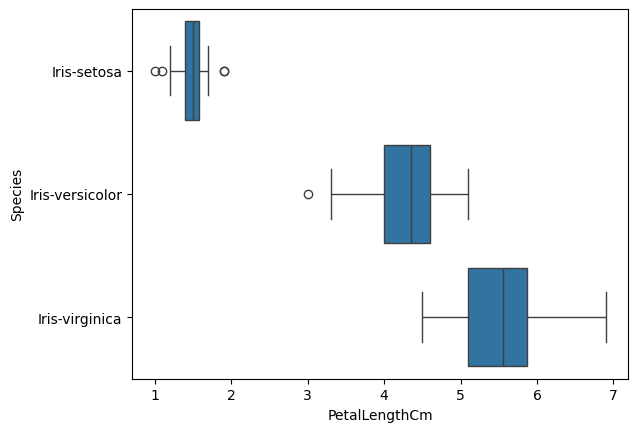

In [481]:
sns.boxplot(x = 'PetalLengthCm', y = 'Species', data = df)
plt.show()

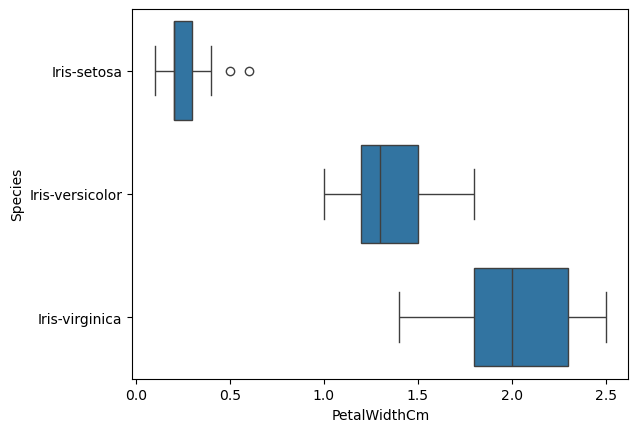

In [483]:
sns.boxplot(x = 'PetalWidthCm', y = 'Species', data = df)
plt.show()

We include the petal length and width, since from the boxplots we see that they appear to have different sizes for different species.

## Fitting some machine learning models
Now we move onto fitting some machine learning models. Firstly, we scale the data and sort it into testing and training data, and then fit it to various methods.

In [485]:
df['Species'] = df['Species'].astype('category').cat.codes

We code the species type for our predictor variable.

In [487]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [489]:
scaler = StandardScaler()
X = df[['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, shuffle = True)

Firstly, we get our predictor variables, excluding the sepal width. Then we standardise the data and split it into testing ans training data.

The first method we try is a one vs all logistic regression.

In [491]:
lr_ova = LogisticRegression(max_iter=1000)
lr_ova.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [493]:
y_hat_lr = lr_ova.predict(X_test)

In [495]:
y_hat_lr_prob = lr_ova.predict_proba(X_test)
print(log_loss(y_test, y_hat_lr_prob))
accuracy_lr = np.round(100*accuracy_score(y_hat_lr, y_test),2)
print(accuracy_lr)
report = classification_report(y_test, y_hat_lr, target_names = ['Setosa', 'Versicolor', 'Virginica'])
print(report)
conf_matrix = confusion_matrix(y_test, y_hat_lr)
print(conf_matrix)

0.15342408083812414
96.67
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Here we see the model performs very well on the testing data with only one data point misclassified. (The results throughout this notebook may be different if run again since I have not used a random seed)

Next we try one vs one logistic regression.

In [499]:
from sklearn.multiclass import OneVsOneClassifier
ovo_lr = OneVsOneClassifier(LogisticRegression())

In [501]:
ovo_lr.fit(X_train, y_train)

OneVsOneClassifier(estimator=LogisticRegression())

In [505]:
y_hat = ovo_lr.predict(X_test)
accuracy = accuracy_score(y_hat, y_test)
print(np.round(100*accuracy, 2))
print(classification_report(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))

96.67
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


This gives us the exactly same results as for the one vs all logisitc regression. Of course we could try different prabability thresholds but we do not try this here.

Next we try a K Nearest Neighbours classifier.

In [509]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(weights = 'distance')

In [511]:
from sklearn.model_selection import GridSearchCV
ns = np.linspace(1,60,60, dtype = int)
params = {'n_neighbors': ns}
knn_c = GridSearchCV(knn, params)

In [513]:
knn_c.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])})

In [515]:
y_hat_knn = knn_c.predict(X_test)

In [520]:
acc_knn = accuracy_score(y_test, y_hat_knn)
print(np.round(100*acc_knn,2))
print(classification_report(y_test, y_hat_knn))
print(confusion_matrix(y_test, y_hat_knn))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


We see after cross validation a value of 3 is selected for the number of neighbours used in the method. After running the model on the test data we see it predicts all the points correctly.

Finally we will now use a decision tree classifier and a random forest model.

In [523]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [525]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [527]:
y_hat_tree = tree.predict(X_test)
acc_tree = accuracy_score(y_test, y_hat_tree)
print(np.round(100*acc_tree,2))
print(classification_report(y_test, y_hat_tree))
print(confusion_matrix(y_test, y_hat_tree))

96.67
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


The decision tree gives us the same results as the logistic regression, we could have experiented with different tree depths and different scoring metrics etc. but we do not do this here.

In [569]:
rf = RandomForestClassifier(max_depth = 4)

In [571]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [573]:
y_hat_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_hat_rf)
print(np.round(100*acc_rf,2))
print(classification_report(y_test, y_hat_rf))
print(confusion_matrix(y_test, y_hat_rf))

96.67
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Once again the random forest gives the same results as the logistic regression and the decision tree classifier. The KNN method gave the best results prediciting all of the testing points correctly.
To conclude, here we have ensured the Iris data set is clean and fit to be used for modelling, and done a little bit of exploratory data analysis where we removed the sepal width variable. Then we ran multiple machine learning methods to classify the species type and calculated the accuracy score, 